In [314]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import fiona
import matplotlib.pyplot as plt
from urllib.request import urlopen
import json
import plotly.express as px

In [315]:
shape_data = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_zcta510_500k.zip")
shape_data.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


In [316]:
shape_data.ZCTA5CE10.dtypes

dtype('O')

In [317]:
shape_data.ZCTA5CE10 = shape_data.ZCTA5CE10.astype('int')
shape_data.ZCTA5CE10.dtypes

dtype('int64')

In [318]:
#filter shape file to just illinois

shape_data = shape_data[shape_data["ZCTA5CE10"] >= 60001]
shape_data= shape_data[shape_data["ZCTA5CE10"] <=62999]
shape_data

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
24,60034,8600000US60034,60034,67280214,0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494..."
118,61414,8600000US61414,61414,131238242,0,"POLYGON ((-90.24813 41.14501, -90.24315 41.145..."
165,62982,8600000US62982,62982,20175875,1552872,"POLYGON ((-88.39697 37.43801, -88.39022 37.437..."
229,60129,8600000US60129,60129,44329894,0,"POLYGON ((-89.00073 42.02189, -88.98602 42.022..."
230,61839,8600000US61839,61839,86254139,0,"POLYGON ((-88.68799 40.14227, -88.65301 40.185..."
...,...,...,...,...,...,...
32859,62218,8600000US62218,62218,119807091,575892,"POLYGON ((-89.57835 38.48485, -89.57401 38.483..."
32878,61252,8600000US61252,61252,152882351,2014365,"POLYGON ((-90.20413 41.79631, -90.19591 41.798..."
32900,61270,8600000US61270,61270,392873961,582693,"POLYGON ((-90.09315 41.88227, -90.09067 41.884..."
33090,60523,8600000US60523,60523,23190737,857837,"MULTIPOLYGON (((-87.98229 41.84673, -87.97710 ..."


In [319]:
#read in BEP Companies DS

bep_comp_addr = pd.read_csv('CAN_DSSI/STATE_OF_ILLINOIS_PROJ/Datasets/bep_company_addresses_all.csv')
bep_comp_addr

,Company Name,Address Type,Street,City,State,ZIP Code
0,#1 Professional Cleaning Services,Mailing,P.O. Box 7555,Westchester,IL,60154
1,#1 Professional Cleaning Services,Physical,2205 Mayfair,Westchester,IL,60154
2,"#9 Design, LLC",Mailing,28 East Saint Charles Road,Villa Park,IL,60181
3,"#9 Design, LLC",Physical,524 West Saint Charles Road,Villa Park,IL,60181
4,'Bouche' Enterprises LLC,Mailing,3511 North Osceola Avenue,Chicago,IL,60634
...,...,...,...,...,...,...
9935,netlogx LLC,Physical,"429 E Vermont St, Ste. 208",Indianapolis,IN,46202
9936,"r6catalyst, LLC",Mailing,"617 Stokes Rd, Suite 4-167",Medford,NJ,8055
9937,"r6catalyst, LLC",Physical,"617 Stokes Rd, Suite 4-167",Medford,NJ,8055
9938,"rSTAR Technologies, LLC",Mailing,"3525 Cass Court, #617",Oak Brook,IL,60523


In [320]:
#filter bep file to just IL comps

just_IL = bep_comp_addr.query("`State` == 'IL'")
just_IL

,Company Name,Address Type,Street,City,State,ZIP Code
0,#1 Professional Cleaning Services,Mailing,P.O. Box 7555,Westchester,IL,60154
1,#1 Professional Cleaning Services,Physical,2205 Mayfair,Westchester,IL,60154
2,"#9 Design, LLC",Mailing,28 East Saint Charles Road,Villa Park,IL,60181
3,"#9 Design, LLC",Physical,524 West Saint Charles Road,Villa Park,IL,60181
4,'Bouche' Enterprises LLC,Mailing,3511 North Osceola Avenue,Chicago,IL,60634
...,...,...,...,...,...,...
9931,mk communications,Physical,"350 West Hubbard Street, Suite 200",Chicago,IL,60654
9932,"myWHY Agency, Inc.",Mailing,"6425 S. Ingleside Ave, 2nd Floor",Chicago,IL,60637
9933,"myWHY Agency, Inc.",Physical,"6425 S. Ingleside Ave, 2nd Floor",Chicago,IL,60637
9938,"rSTAR Technologies, LLC",Mailing,"3525 Cass Court, #617",Oak Brook,IL,60523


In [321]:
#merging IL companies w IL Zip Codes 

ILComp_ShapeMerge = shape_data.merge(just_IL, how='outer', left_on='ZCTA5CE10', right_on='ZIP Code')
ILComp_ShapeMerge



,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Company Name,Address Type,Street,City,State,ZIP Code
0,60034.0,8600000US60034,60034,67280214.0,0.0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494...","KBI CUSTOM CASE, INC.",Mailing,12406 Hansen Road,Hebron,IL,60034.0
1,60034.0,8600000US60034,60034,67280214.0,0.0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494...",North States Steel Corp.,Mailing,12255 Rt 173,Hebron,IL,60034.0
2,60034.0,8600000US60034,60034,67280214.0,0.0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494...",North States Steel Corp.,Physical,12255 Rt 173,Hebron,IL,60034.0
3,61414.0,8600000US61414,61414,131238242.0,0.0,"POLYGON ((-90.24813 41.14501, -90.24315 41.145...",NaN,NaN,NaN,NaN,NaN,NaN
4,62982.0,8600000US62982,62982,20175875.0,1552872.0,"POLYGON ((-88.39697 37.43801, -88.39022 37.437...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9489,NaN,NaN,NaN,NaN,NaN,None,Pamela Kay Jurkoshek,Mailing,Po Box 8733,Springfield,IL,62791.0
9490,NaN,NaN,NaN,NaN,NaN,None,Pamela Kay Jurkoshek,Physical,Po Box 8733,Springfield,IL,62791.0
9491,NaN,NaN,NaN,NaN,NaN,None,"Physics at Work, LLC",Mailing,"1733 W. Irving Park, #408",Chicago,IL,50513.0
9492,NaN,NaN,NaN,NaN,NaN,None,"Physics at Work, LLC",Physical,"1733 W. Irving Park, #408",Chicago,IL,50513.0


<Axes: >

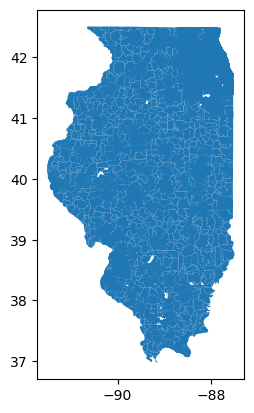

In [322]:
#verifying ZIPS plot correctly

ILComp_ShapeMerge.plot()

In [323]:
#here we count number of companies in each ZIP

Counting_ILComps_inZIPS = ILComp_ShapeMerge.groupby('ZIP Code').count()[['State']]
Counting_ILComps_inZIPS = Counting_ILComps_inZIPS.reset_index()
Counting_ILComps_inZIPS

,ZIP Code,State
0,6003.0,1
1,46804.0,1
2,50513.0,2
3,60002.0,8
4,60004.0,14
...,...,...
537,62976.0,2
538,62984.0,1
539,62995.0,2
540,63105.0,1


In [324]:
#rename the column

Counting_ILComps_inZIPS.columns =['ZIP Code','Count of Companies']
Counting_ILComps_inZIPS

,ZIP Code,Count of Companies
0,6003.0,1
1,46804.0,1
2,50513.0,2
3,60002.0,8
4,60004.0,14
...,...,...
537,62976.0,2
538,62984.0,1
539,62995.0,2
540,63105.0,1


In [325]:
#change ZIPS from floats to integers

Counting_ILComps_inZIPS['ZIP Code'] = Counting_ILComps_inZIPS['ZIP Code'].astype(int) 
Counting_ILComps_inZIPS

,ZIP Code,Count of Companies
0,6003,1
1,46804,1
2,50513,2
3,60002,8
4,60004,14
...,...,...
537,62976,2
538,62984,1
539,62995,2
540,63105,1


In [326]:
#here we merge to add our counts to the full geodf so we can plot

ILComps_ZIPS_Count = pd.merge(shape_data,Counting_ILComps_inZIPS,left_on='ZCTA5CE10', right_on='ZIP Code', how='outer')

ILComps_ZIPS_Count


,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,ZIP Code,Count of Companies
0,60034.0,8600000US60034,60034,67280214.0,0.0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494...",60034.0,3.0
1,61414.0,8600000US61414,61414,131238242.0,0.0,"POLYGON ((-90.24813 41.14501, -90.24315 41.145...",NaN,NaN
2,62982.0,8600000US62982,62982,20175875.0,1552872.0,"POLYGON ((-88.39697 37.43801, -88.39022 37.437...",NaN,NaN
3,60129.0,8600000US60129,60129,44329894.0,0.0,"POLYGON ((-89.00073 42.02189, -88.98602 42.022...",NaN,NaN
4,61839.0,8600000US61839,61839,86254139.0,0.0,"POLYGON ((-88.68799 40.14227, -88.65301 40.185...",NaN,NaN
...,...,...,...,...,...,...,...,...
1414,NaN,NaN,NaN,NaN,NaN,None,62705.0,1.0
1415,NaN,NaN,NaN,NaN,NaN,None,62708.0,2.0
1416,NaN,NaN,NaN,NaN,NaN,None,62791.0,2.0
1417,NaN,NaN,NaN,NaN,NaN,None,63105.0,1.0


In [327]:
#here we fill in NAN values inside our Count column to 0's
#we also verify that it worked

ILComps_ZIPS_Count['Count of Companies'] = ILComps_ZIPS_Count['Count of Companies'].fillna(0)

ILComps_ZIPS_Count['Count of Companies'].min()

0.0

<Axes: >

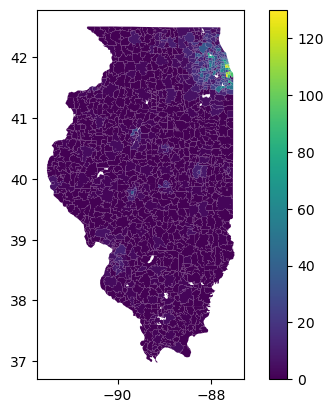

In [328]:
#here we finally make our plot

ILComps_ZIPS_Count.plot(column='Count of Companies', legend=True, cmap='viridis')